In [8]:
import pandas as pd
import seaborn as sns
import rho_plus as rp
from baysic.utils import quick_view, json_to_df
IS_DARK = False
theme, cs = rp.mpl_setup(IS_DARK)
rp.plotly_setup(IS_DARK)
rp.bokeh_setup(IS_DARK)

In [259]:
from pathlib import Path
from datetime import datetime

date = datetime.now().strftime('%m-%d')

comp = 'K4C2N4'
true = 'C2/m, monoclinic'
# comp = 'Al6V2'
# true = 'I4/mmm, tetragonal'
# comp = 'Mg6Au2'
# true = 'P63/mmc, hexagonal'
# date = '10-08'
# comp = 'Ce1B1Rh3'
# true = 'Pm-3m, cubic'
# date = '10-08'

run_id = Path('logs') / date / comp / '1'

total_df = json_to_df(run_id / 'total.json')
total_df.head()

,lattice_type,sg_symbol,sg_number,prop_generated,avg_num_successful,prop_actual_success,best_struct
0,hexagonal,P-3,147,0.028000,0.124000,0.469697,"[[ 1.63873148 -2.83836603 0. ] K, [1.6..."
1,hexagonal,P312,149,0.004000,0.040000,0.500000,"[[0. 0. 0.] K, [2.25299413 1.30076674 7.915998..."
2,hexagonal,P321,150,0.030769,0.276923,0.843750,"[[0. 0. 0.] N, [ 1.0795528 -1.86984021 0. ..."
3,hexagonal,P31m,157,0.012000,0.120000,0.491803,"[[ 1.93153569 -3.34551781 4.29687457] K, [1.9..."
4,hexagonal,P3c1,158,0.250000,2.500000,1.000000,"[[0. 0. 1.7573579] K, [0. ..."


In [260]:
quick_view(total_df['best_struct'].iloc[0])

In [261]:
from baysic.lattice import LATTICES
from baysic.utils import df_to_json

big_df = []

for lat_type in LATTICES:
    groups = lat_type.get_groups()

    for group in groups:
        path = run_id / f'{group.number}.json'
        if path.exists():
            df = json_to_df(path)
            df['lattice_type'] = lat_type.lattice_type
            df['sg_num'] = group.number
            df['symbol'] = group.symbol            
            big_df.append(df)

df = pd.concat(big_df).reset_index(drop=True)
df['num_pos'] = df['wsyms'].str.count('_') + 1
df_to_json(df, f'logs/{comp}.json')
df

,gen,e_form,wsyms,lat_matrix,lat_vol,lattice_type,sg_num,symbol,num_pos
0,"[[2.77106905 2.77106905 2.77106905] C, [0. 0. ...",1.365102,b_a_e_e,"[5.5421380997, 0.0, 0.0, 0.0, 5.5421380997, 0....",170.228394,cubic,195,P23,4
1,"[[2.77106905 2.77106905 2.77106905] C, [0. 0. ...",1.369089,b_a_e_e,"[5.5421380997, 0.0, 0.0, 0.0, 5.5421380997, 0....",170.228394,cubic,195,P23,4
2,"[[2.77106905 2.77106905 2.77106905] C, [0. 0. ...",1.357934,b_a_e_e,"[5.5421380997, 0.0, 0.0, 0.0, 5.5421380997, 0....",170.228394,cubic,195,P23,4
3,"[[2.77106905 2.77106905 2.77106905] C, [0. 0. ...",0.884906,b_a_e_e,"[5.5421380997, 0.0, 0.0, 0.0, 5.5421380997, 0....",170.228394,cubic,195,P23,4
4,"[[2.77106905 2.77106905 2.77106905] C, [0. 0. ...",1.100553,b_a_e_e,"[5.5421380997, 0.0, 0.0, 0.0, 5.5421380997, 0....",170.228394,cubic,195,P23,4
...,...,...,...,...,...,...,...,...,...
5518,"[[ 2.18553168 1.26181725 11.43703794] C, [ 2....",1.834234,d_e_f,"[2.1855316162, -3.7854516506, 0.0, 2.185531616...",252.323135,hexagonal,194,P63/mmc,3
5519,"[[ 2.13544614 1.23290042 16.45373869] C, [ 2....",1.853119,d_c_b_e,"[2.1354460716, -3.6987011433, 0.0, 2.135446071...",346.554199,hexagonal,194,P63/mmc,4
5520,"[[ 2.13544614 1.23290042 16.45373869] C, [ 2....",1.850724,d_c_b_e,"[2.1354460716, -3.6987011433, 0.0, 2.135446071...",346.554199,hexagonal,194,P63/mmc,4
5521,"[[ 2.13544614 1.23290042 16.45373869] C, [ 2....",1.773156,d_c_b_e,"[2.1354460716, -3.6987011433, 0.0, 2.135446071...",346.554199,hexagonal,194,P63/mmc,4


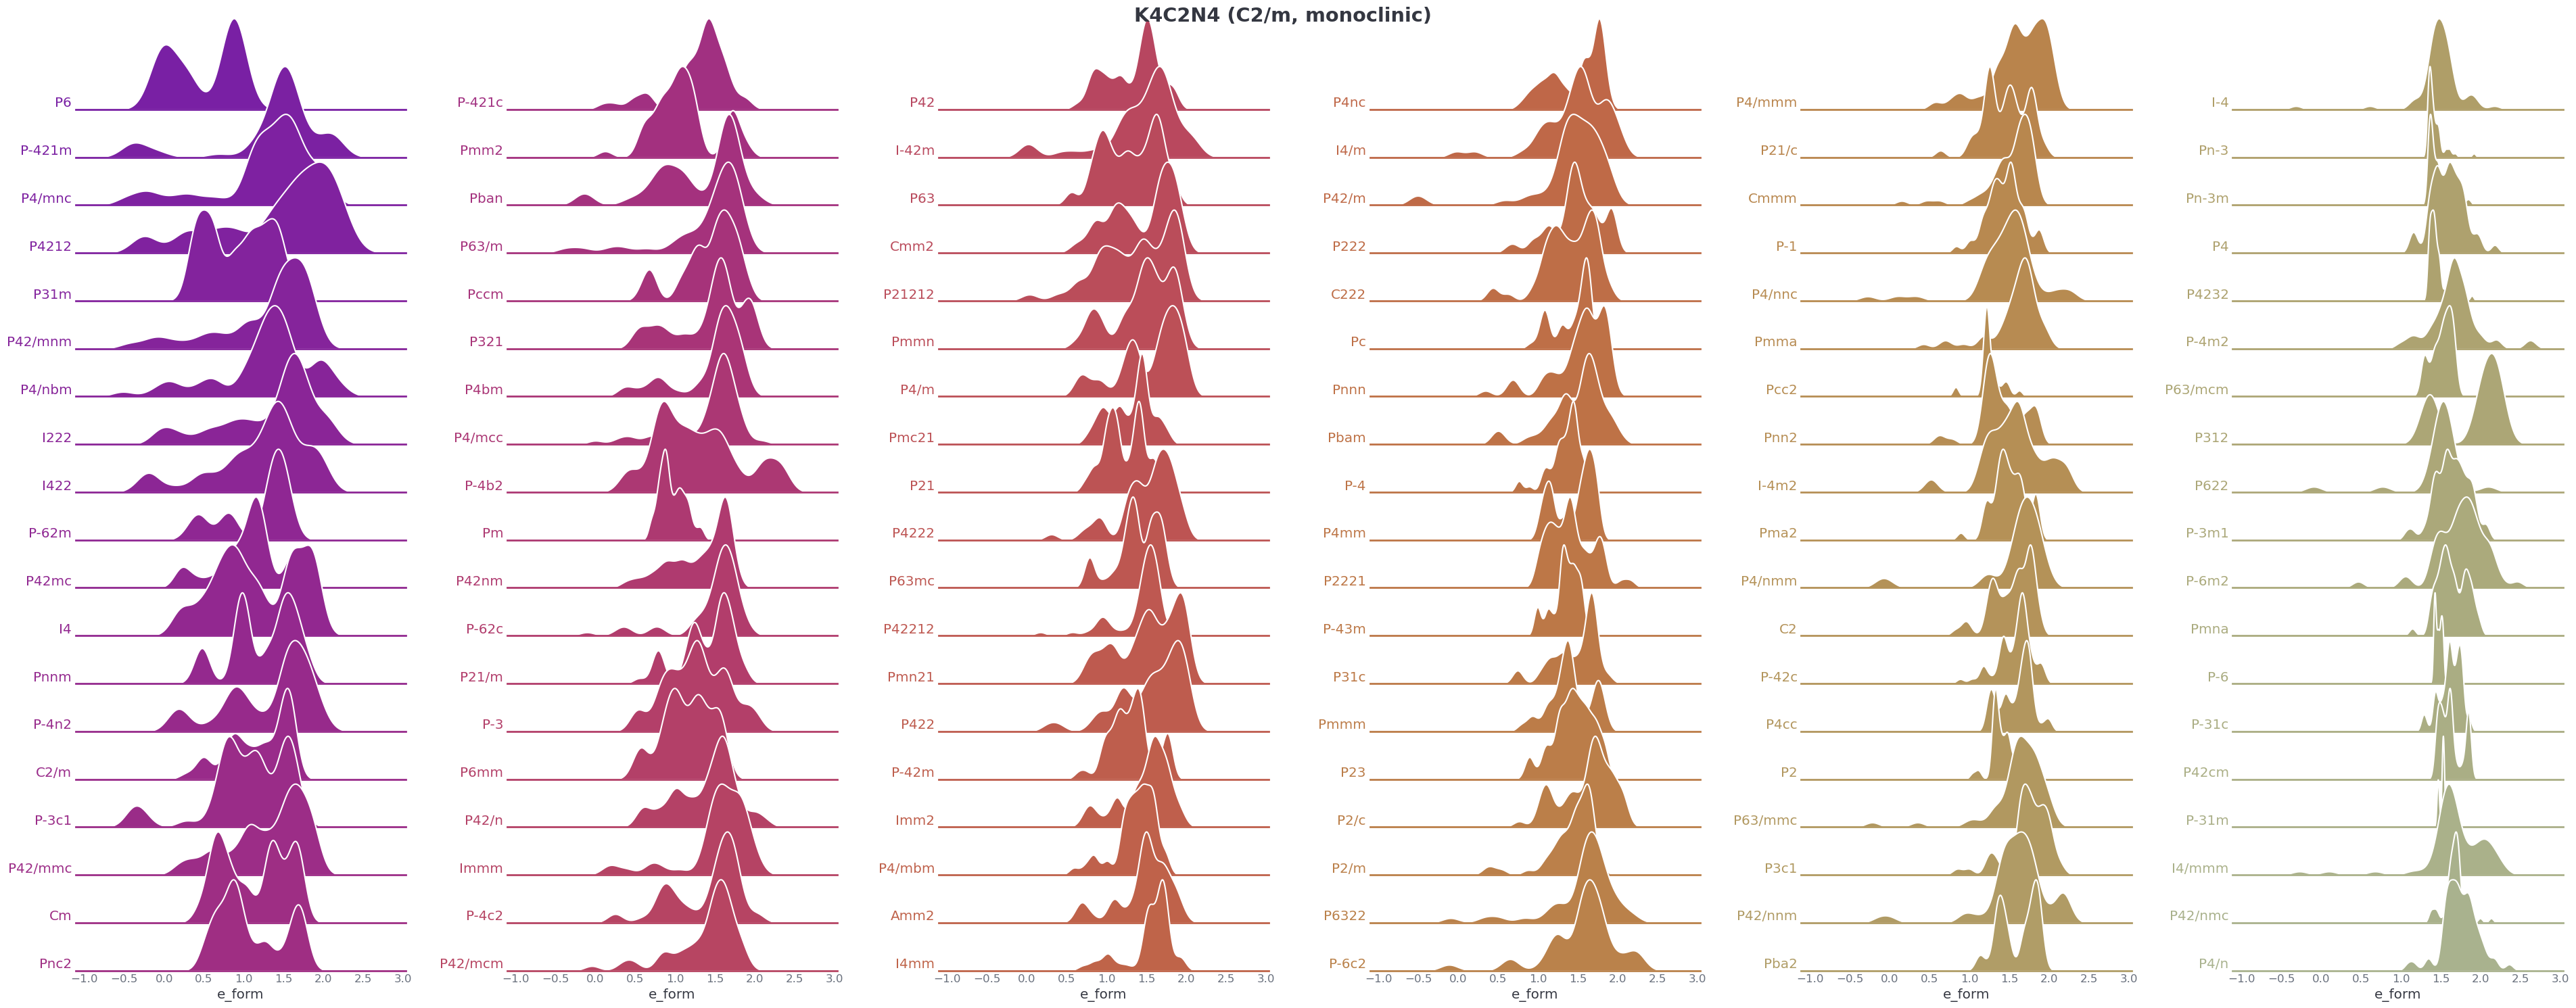

In [281]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def ridge_plot(
    df: pd.DataFrame,
    group_var: str,
    num_var: str,    
    order_by = lambda x: np.quantile(x, 0.1),
    height: int = 10,
    subplot_height: float = 0.8
):
    if order_by is not None:        
        order = df[[group_var, num_var]].groupby(group_var).agg(order_by)[num_var].sort_values().index        
        palette = 'rho_solara'

    else:
        order = pd.unique(df[group_var])
        palette = 'rho_iso_spectra'
    
    hspace = -0.5
    num_rows = int(height / ((1 + hspace) * subplot_height))
    num_cols = int(np.ceil(len(order) / num_rows))    
    pad_order = np.concatenate([order.values, [np.nan for _ in range(num_rows * num_cols - len(order))]], dtype=object)
    pad_order = pad_order.reshape(num_rows, num_cols)
    order_i = 0
    for j in range(num_cols):
        for i in range(num_rows):
            if not pd.isnull(pad_order[i, j]):
                pad_order[i, j] = order[order_i]
                order_i += 1
    col_order = pad_order.flatten()
    col_order = col_order[~pd.isnull(col_order)]
    hue_order = df[[group_var, num_var]].groupby(group_var).agg(order_by)[num_var].sort_values().index

    g = sns.FacetGrid(
        df, col=group_var, hue=group_var, aspect=8, height=subplot_height, col_wrap=num_cols,
        palette=palette, col_order=col_order, hue_order=hue_order, sharey=False)

    # Draw the densities in a few steps
    kde_params = dict(bw_adjust=0.5)
    g.map(sns.kdeplot, num_var, clip_on=False,
        fill=True, alpha=1, linewidth=1.5, edgecolor=plt.rcParams['figure.facecolor'], **kde_params)    

    # passing color=None to refline() uses the hue mapping
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.set_facecolor((0, 0, 0, 0))
        ax.set_ylabel(label, color=color, ha="right", rotation=0, y=0, va='bottom')

    g.map(label, "lattice_type")

    # Set the subplots to overlap    
    g.figure.subplots_adjust(hspace=hspace)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.set_xlabels(num_var)
    g.despine(bottom=True, left=True)

    return g

g = ridge_plot(df, 'symbol', 'e_form', height=8)
g.figure.suptitle(f'{comp} ({true})')
g.savefig(f'images/{comp}_groups.png')

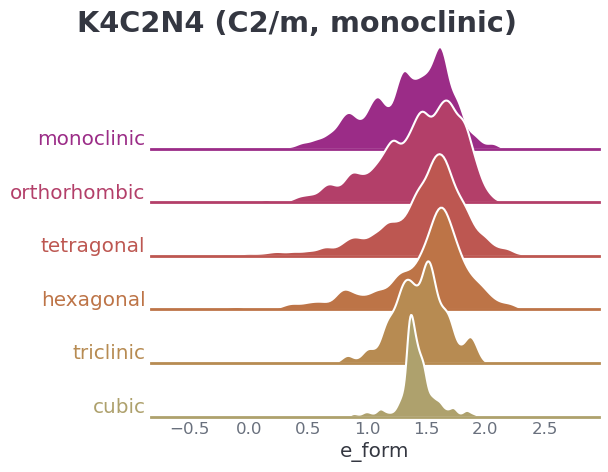

In [255]:
g = ridge_plot(df, 'lattice_type', 'e_form')
g.figure.suptitle(f'{comp} ({true})')
g.savefig(f'images/{comp}_systems.png')

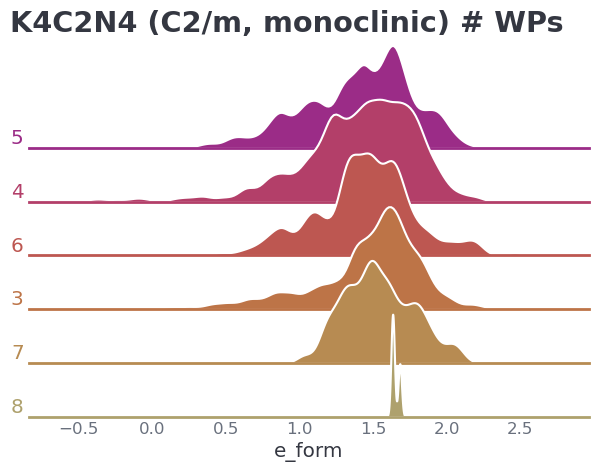

In [256]:
g = ridge_plot(df, 'num_pos', 'e_form')
g.figure.suptitle(f'{comp} ({true}) # WPs')
g.savefig(f'images/{comp}_num_positions.png')

In [277]:
df_sort = df.sort_values('e_form')
display(df_sort)
quick_view(df_sort.query('sg_num == 12')['gen'].iloc[0], radius_strategy='covalent')

,gen,e_form,wsyms,lat_matrix,lat_vol,lattice_type,sg_num,symbol,num_pos
569,"[[1.83238471 1.83238471 3.42376685] K, [ 1.832...",-0.518381,f_b_e_g,"[3.6647694111, 0.0, 0.0, 0.0, 3.6647694111, 0....",183.932068,tetragonal,84,P42/m,4
2138,"[[4.09150422 1.36383474 3.92820048] K, [1.3638...",-0.516426,d_c_a_g,"[5.4553389549, 0.0, 0.0, 0.0, 5.4553389549, 0....",233.812180,tetragonal,125,P4/nbm,4
568,"[[1.83238471 1.83238471 3.42376685] K, [ 1.832...",-0.497789,f_b_e_g,"[3.6647694111, 0.0, 0.0, 0.0, 3.6647694111, 0....",183.932068,tetragonal,84,P42/m,4
2254,"[[0. 2.81044149 1.90709579] K, [2.8104...",-0.491590,d_a_e,"[5.620882988, 0.0, 0.0, 0.0, 5.620882988, 0.0,...",241.013626,tetragonal,128,P4/mnc,3
2516,"[[0. 2.63533807 0. ] K, [0. ...",-0.429839,c_b_e,"[5.270676136, 0.0, 0.0, 0.0, 5.270676136, 0.0,...",199.449371,tetragonal,136,P42/mnm,3
...,...,...,...,...,...,...,...,...,...
1809,"[[0. 0. 0.] C, [3.22305489 3.22305489 0. ...",2.326968,a_h_f,"[6.4461097717, 0.0, 0.0, 0.0, 6.4461097717, 0....",259.630676,tetragonal,117,P-4b2,3
643,"[[1.25854433 3.77563298 0. ] K, [3.7756...",2.358718,a_f_c_c,"[5.0341773033, 0.0, 0.0, 0.0, 5.0341773033, 0....",265.771454,tetragonal,85,P4/n,4
5322,"[[0. 0. 0.] C, [ 0. 0. 10.999...",2.459925,a_b_i_i_i_i,"[2.1669995785, -3.7533533573, 0.0, 2.166999578...",357.848816,hexagonal,187,P-6m2,6
1703,"[[0.97644396 0. 7.63511064] N, [-0.976...",2.599741,j_g_f_g,"[3.6914479733, 0.0, 0.0, 0.0, 3.6914479733, 0....",280.437469,tetragonal,115,P-4m2,4


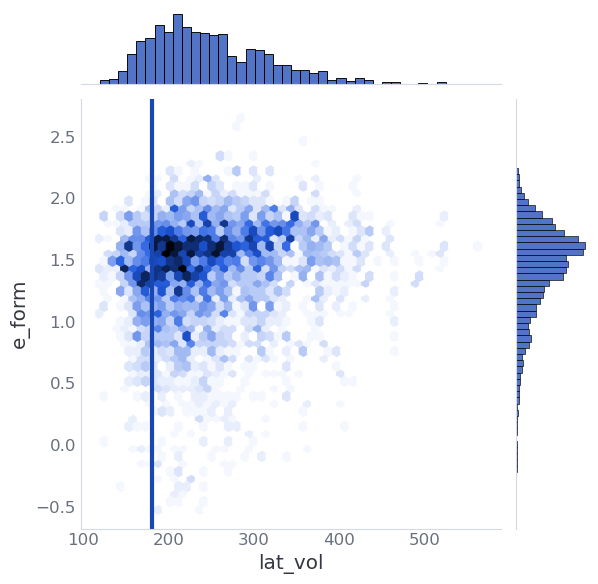

In [280]:
sns.jointplot(df, x='lat_vol', y='e_form', kind='hex')
plt.axvline(180)